In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

portfolio = pd.read_csv('./large_pf.csv',index_col=0)
portfolio.head()

,mean_return,variance,pf_weights,bm_weights,Security,GICS Sector,GICS Sub Industry
A,0.146146,0.035194,0.000,0.0,Agilent Technologies Inc,Health Care,Health Care Equipment
AAL,0.444411,0.094328,0.214,0.0,American Airlines Group,Industrials,Airlines
AAP,0.242189,0.029633,0.000,0.0,Advance Auto Parts,Consumer Discretionary,Automotive Retail
AAPL,0.225074,0.027283,0.000,0.0,Apple Inc.,Information Technology,Computer Hardware
ABBV,0.182541,0.029926,0.000,0.0,AbbVie,Health Care,Pharmaceuticals


In [2]:
# Check the portfolio weights
portfolio_data = portfolio.copy()
print(portfolio_data.pf_weights.sum())


100.0


In [3]:
# Calculate return of the portfolio
total_return_pf = (portfolio_data['pf_weights']*portfolio_data['mean_return']).sum()

# Calculate return of the benchmark
total_return_bm = (portfolio_data['bm_weights']*portfolio_data['mean_return']).sum()

# Calculate and print the active return
active_return = total_return_pf - total_return_bm
print ("%.2f%%" % active_return)
total_return_bm, total_return_pf

22.58%


(10.557642112692943, 33.134025872593554)

Great work! You now have calculated the most relevant performance number for a benchmarked portfolio. Next time someone tells you about their great performance, make sure to ask about their performance relative to the benchmark, as that's where a talented portfolio manager can differentiate him/herself.

In [4]:
# Print the sum of the bm and pf weights
print (portfolio_data.bm_weights.sum())
print (portfolio_data.pf_weights.sum())

# Group dataframe by GICS sectors 
grouped_df=portfolio_data.groupby('GICS Sector').sum()

# Calculate active weights of portfolio
grouped_df['active_weight']=grouped_df['pf_weights']-grouped_df['bm_weights']
print (grouped_df['active_weight'])

100.001
100.0
GICS Sector
Consumer Discretionary         20.257
Consumer Staples               -5.176
Energy                          0.000
Financials                     -2.116
Health Care                     2.865
Industrials                     2.465
Information Technology          8.693
Materials                      -2.043
Real Estate                     2.014
Telecommunications Services    -1.367
Utilities                     -25.593
Name: active_weight, dtype: float64


Correct! You can quickly see from the negative and positive values of the active weights whether the portfolio was over- or underweight a certain sector.

In [5]:
df = pd.DataFrame()
df = pd.read_csv('./df_sp500.csv',index_col=0)


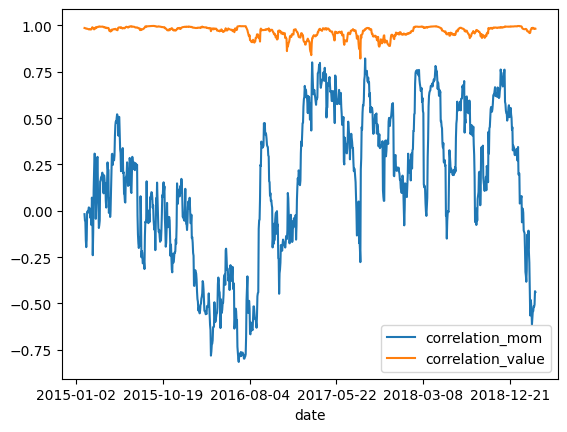

In [6]:
# Calculate 20-day rolling correlation with momentum 
df['correlation_mom']=df['sp500'].rolling(20).corr(df['momentum'])

# Calculate 20-day rolling correlation with value
df['correlation_value']=df['sp500'].rolling(20).corr(df['value'])

# Plot the correlations
df['correlation_mom'].plot()
df['correlation_value'].plot()
plt.legend()
plt.show()

In [7]:
factor_data = pd.read_csv('./factor_data.csv',index_col=0)

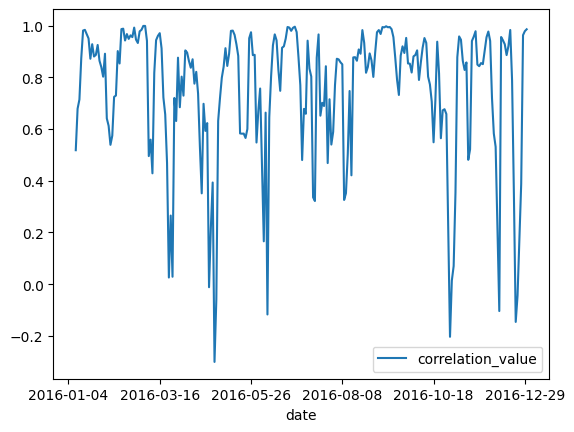

In [8]:
# Calculate the pairwise correlation
factor_data.corr()

# Calculate rolling 5 day correlation 
factor_data['correlation_value']=factor_data['portfolio'].rolling(5).corr(factor_data['value'])

# Plot the rolling correlation
factor_data['correlation_value'].plot()
plt.legend()
plt.show() 

Correct! There are so many moving parts, and the interaction between your portfolio and the underlying factors changes constantly. It would only be stable if you would completely follow the factor composition.

In [9]:
factor_data = pd.read_csv('./factors_pf_returns.csv',index_col=0)
factor_data.corr()

,Mkt-RF,SMB,HML,RF,pf_returns
Mkt-RF,1.000000,0.331250,0.099800,0.087073,0.738586
SMB,0.331250,1.000000,-0.108081,0.076750,0.162303
HML,0.099800,-0.108081,1.000000,-0.049019,-0.237647
RF,0.087073,0.076750,-0.049019,1.000000,0.039383
pf_returns,0.738586,0.162303,-0.237647,0.039383,1.000000


In [10]:
factor_returns = factor_data.copy()

In [12]:
import statsmodels.api as sm
# Define the model
model = sm.OLS(factor_returns['pf_returns'], factor_returns[['Mkt-RF','SMB', 'HML']]).fit()

# Create model predictions
predictions = model.predict(factor_returns[['Mkt-RF','SMB', 'HML']]) 

# Print out the summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:             pf_returns   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.653
Method:                 Least Squares   F-statistic:                              158.8
Date:                Wed, 29 Nov 2023   Prob (F-statistic):                    1.55e-57
Time:                        22:32:21   Log-Likelihood:                         -185.67
No. Observations:                 252   AIC:                                      377.3
Df Residuals:                     249   BIC:                                      387.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [13]:
# Import statsmodels
import statsmodels.api as sm

# Obtain the beta coefficients
b1, b2, b3 = sm.OLS(factor_returns['pf_returns'], factor_returns[['Mkt-RF','SMB', 'HML']]).fit().params

# Print the betas
print ('Sensitivities of active returns to factors:\nMkt-Rf: %f\nSMB: %f\nHML: %f' %  (b1, b2, b3))

Sensitivities of active returns to factors:
Mkt-Rf: 0.823443
SMB: -0.227198
HML: -0.482598


In [15]:
# !pip install pyfolio

In [16]:
import pyfolio as pf
returns = pd.read_csv('./sp500.csv',index_col=0)

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [18]:
returns_sp500 = returns['S&P500'].pct_change()

In [21]:
# def display_tear_sheet():
#   p = 'pyfolio_tear_sheet_3.13.png'
#   HtmlManager.getPlots().append(FigHtml([p]))

# def display_tear_sheet():
#   p = 'pyfolio_tear_sheet_3.13.png'
#   HtmlManager.getPlots().append(FigHtml([p]))

In [23]:
# Set the index to datetime
# returns_sp500.index=pd.to_datetime(returns_sp500.index)

# # Ensure the returns are a series
# returns=returns_sp500['S&P500']

# Create the returns tear sheet
fig = pf.create_returns_tear_sheet(returns, return_fig=True)

# Display a zoomed in version of the tear sheet
# display_tear_sheet()
fig.savefig('pyfolio_tear_sheet_3.13.png')


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\empyrical\stats.py:262: RuntimeWarning: overflow encountered in accumulate
  out.cumprod(axis=0, out=out)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\empyrical\stats.py:396: RuntimeWarning: invalid value encountered in subtract
  nanmin((cumulative - max_return) / max_return, axis=0, out=out)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Great work! By scrolling through the performance tear sheet you see that you can obtain all kinds of risk and return calculations. Many of the things we have covererd throughout this course are now calcuated in just a few lines of code. Pyfolio can thus save you a lot of time! You can find the cumulative returns, rolling volatility, the Sharpe ratio, the Sortino ratio, the return distribution, skewness, kurtosis, as well as draw-downs on the tear sheet. Make sure to take a moment to locate all these items, and familiarize yourself with the pyfolio returns tear sheet.

In [25]:
# Define sector mappings
sect_map = {'COST': 'Consumer Goods',
            'INTC': 'Technology', 
            'CERN': 'Healthcare', 
            'GPS': 'Technology',
            'MMM': 'Construction', 
            'DELL': 'Technology', 
            'AMD': 'Technology'}

# Create sector exposure tear sheet
pf.create_position_tear_sheet(returns, positions, sector_mappings=sect_map)
display_tear_sheet()

NameError: name 'positions' is not defined